In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

import json

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

# usa.gov data from bit.ly

In [3]:
os.environ['HOME']

'/home/dragon'

In [4]:

pfda_root = os.environ['HOME'] + '/repos/wesm/pydata-book/'
path = pfda_root + 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]
print('read {0} lines of type {1}'.format(len(records),type(records[0])))
print('\nkeys of first record: ', records[0].keys())
print('\nfirst record:', records[0])

read 3560 lines of type <class 'dict'>

keys of first record:  dict_keys(['nk', 'hh', 'll', 'c', 'h', 'l', 'a', 'hc', 'gr', 'cy', 't', 'g', 'tz', 'r', 'al', 'u'])

first record: {'nk': 1, 'hh': '1.usa.gov', 'll': [42.576698, -70.954903], 'c': 'US', 'h': 'wfLQtf', 'l': 'orofrog', 'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'hc': 1331822918, 'gr': 'MA', 'cy': 'Danvers', 't': 1331923247, 'g': 'A6qOVH', 'tz': 'America/New_York', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'al': 'en-US,en;q=0.8', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}


u here in front of the quotation stands for unicode

getting time zones

In [5]:
time_zones = [record['tz'] for record in records if 'tz' in record]
print('#time zones: {0}'.format(len(time_zones)))

#time zones: 3440


getting counts of the time zones: way 1

In [6]:
def get_counts_1(sequence):
    counts = {}
    for x in sequence:
        if x not in counts:
            counts[x] = 0
        counts[x] += 1
    return counts
print(get_counts_1(time_zones))

{'': 521, 'Asia/Hong_Kong': 10, 'Europe/Stockholm': 14, 'Europe/Paris': 14, 'Europe/Madrid': 35, 'Europe/Vienna': 6, 'Europe/Berlin': 28, 'America/Edmonton': 6, 'Africa/Lusaka': 1, 'Asia/Dubai': 4, 'Europe/Rome': 27, 'America/Guayaquil': 2, 'America/Managua': 3, 'America/New_York': 1251, 'Europe/London': 74, 'Europe/Bratislava': 3, 'Asia/Riyadh': 1, 'America/Indianapolis': 20, 'America/Argentina/Buenos_Aires': 1, 'Africa/Casablanca': 1, 'America/Argentina/Mendoza': 1, 'Europe/Oslo': 10, 'Europe/Ljubljana': 1, 'Europe/Dublin': 3, 'Europe/Zurich': 4, 'America/Halifax': 4, 'Pacific/Honolulu': 36, 'America/Montevideo': 1, 'Asia/Jerusalem': 3, 'Europe/Copenhagen': 5, 'America/Bogota': 3, 'Europe/Budapest': 5, 'America/Puerto_Rico': 10, 'Europe/Moscow': 10, 'Australia/Queensland': 1, 'America/Rainy_River': 25, 'Asia/Novosibirsk': 1, 'America/Monterrey': 1, 'Europe/Helsinki': 10, 'Africa/Johannesburg': 1, 'Asia/Tokyo': 37, 'America/Santo_Domingo': 1, 'Europe/Prague': 10, 'America/Vancouver': 

In [7]:
import collections as cl
def get_counts_2(sequence):
    counts = cl.defaultdict(int) # vals init to zero
    for record in sequence:
        counts[record] += 1
    return counts
print(get_counts_2(time_zones))

defaultdict(<class 'int'>, {'': 521, 'Asia/Hong_Kong': 10, 'Europe/Stockholm': 14, 'Europe/Paris': 14, 'Europe/Madrid': 35, 'Europe/Vienna': 6, 'Europe/Berlin': 28, 'America/Edmonton': 6, 'Africa/Lusaka': 1, 'Asia/Dubai': 4, 'Europe/Rome': 27, 'America/Guayaquil': 2, 'America/Managua': 3, 'America/New_York': 1251, 'Europe/London': 74, 'Europe/Bratislava': 3, 'Asia/Riyadh': 1, 'America/Indianapolis': 20, 'America/Argentina/Buenos_Aires': 1, 'Africa/Casablanca': 1, 'America/Argentina/Mendoza': 1, 'Europe/Oslo': 10, 'Europe/Ljubljana': 1, 'Europe/Dublin': 3, 'Europe/Zurich': 4, 'America/Halifax': 4, 'Pacific/Honolulu': 36, 'America/Montevideo': 1, 'Asia/Jerusalem': 3, 'Europe/Copenhagen': 5, 'America/Bogota': 3, 'Europe/Budapest': 5, 'America/Puerto_Rico': 10, 'Europe/Moscow': 10, 'Australia/Queensland': 1, 'America/Rainy_River': 25, 'Asia/Novosibirsk': 1, 'America/Monterrey': 1, 'Europe/Helsinki': 10, 'Africa/Johannesburg': 1, 'Asia/Tokyo': 37, 'America/Santo_Domingo': 1, 'Europe/Prague'

get the top n counts

In [8]:
def top_counts(sequence, n=10):
    counts_tz = [(count, tz) for (tz, count) in get_counts_2(sequence).items()]
    counts_tz.sort(reverse=True)
    return counts_tz[:n]
print(top_counts(time_zones))

[(1251, 'America/New_York'), (521, ''), (400, 'America/Chicago'), (382, 'America/Los_Angeles'), (191, 'America/Denver'), (74, 'Europe/London'), (37, 'Asia/Tokyo'), (36, 'Pacific/Honolulu'), (35, 'Europe/Madrid'), (33, 'America/Sao_Paulo')]


using python std libraries

In [9]:
counts = cl.Counter(get_counts_2(time_zones))
print(type(counts))

<class 'collections.Counter'>


In [10]:
print(counts.most_common(10))

[('America/New_York', 1251), ('', 521), ('America/Chicago', 400), ('America/Los_Angeles', 382), ('America/Denver', 191), ('Europe/London', 74), ('Asia/Tokyo', 37), ('Pacific/Honolulu', 36), ('Europe/Madrid', 35), ('America/Sao_Paulo', 33)]


using pandas

In [11]:
from pandas import DataFrame, Series
import pandas as pd

In [12]:
frame = DataFrame(records)
frame.keys()

Index(['_heartbeat_', 'a', 'al', 'c', 'cy', 'g', 'gr', 'h', 'hc', 'hh', 'kw',
       'l', 'll', 'nk', 'r', 't', 'tz', 'u'],
      dtype='object')

In [13]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

The Series object returned by frame['tz'] has a method value_counts that gives us what we’re looking for:

In [14]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

fills the NA/NaN values with the string 'missing'

In [15]:
clean_tz = frame['tz'].fillna('missing')

In [16]:
clean_tz[clean_tz == ''] = 'unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

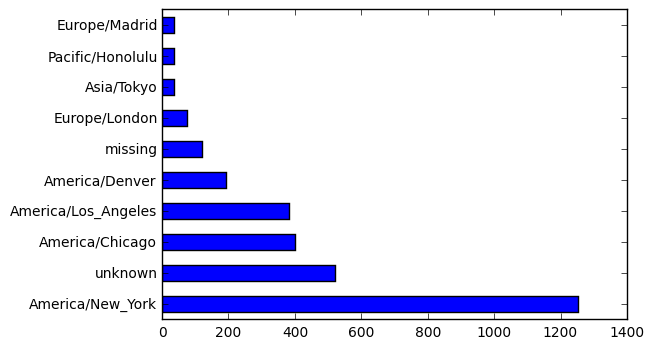

In [17]:
tz_counts[:10].plot(kind='barh', rot=0)
plt.show()

# Get agent information

In [18]:
agents = Series([x.split()[0] for x in frame.a.dropna()])
agents.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

## check if the agent is windows

Now, suppose you wanted to decompose the top time zones into Windows and non-Windows users.  

As a simplification, let’s say that a user is on Windows if the string 'Windows' is in the agent string.

Since some of the agents are missing, I’ll exclude these from the data:

In [ ]:
cframe = frame[frame.a.notnull()]
print("count :: frame: {0}, cframe: {1}".format(
        len(frame), len(cframe)))

np.where(cond, val_if_T, val_if_F)

In [33]:
op_system = np.where(cframe['a'].str.contains('Windows'),'win','non-win')
print('first five values of OS:', op_system[:5])
print('')
print('count of win and non-win users: ')
Series(op_system).value_counts()

first five values of OS: ['win' 'non-win' 'win' 'non-win' 'win']

count of win and non-win users: 


win        2246
non-win    1194
dtype: int64

## grouping by os and timezone

In [35]:
cframe_clean = cframe
print(cframe_clean[:1])
#cframe_clean = cframe['tz'].fillna('missing')
# cframe_clean[cframe_clean['tz'] == ''] = 'unknown'

   _heartbeat_                                                  a  \
0          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   

               al   c       cy       g  gr       h            hc         hh  \
0  en-US,en;q=0.8  US  Danvers  A6qOVH  MA  wfLQtf  1.331823e+09  1.usa.gov   

    kw        l                       ll   nk  \
0  NaN  orofrog  [42.576698, -70.954903]  1.0   

                                                   r             t  \
0  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...  1.331923e+09   

                 tz                                            u  
0  America/New_York  http://www.ncbi.nlm.nih.gov/pubmed/22415991  


Note the important thing in groupby  
the first arg is a column name  
the second arg is an np array  
what the fuck

In [36]:
cframe_by_tz_os = cframe_clean.groupby(['tz', op_system])
print("type(cframe_by_tz_os): ",
        type(cframe_by_tz_os))
print("type(cframe_by_tz_os.size()): ",
        type(cframe_by_tz_os.size()))
print("type(cframe_by_tz_os.size().unstack()): ",
        type(cframe_by_tz_os.size().unstack()))

type(cframe_by_tz_os):  <class 'pandas.core.groupby.DataFrameGroupBy'>
type(cframe_by_tz_os.size()):  <class 'pandas.core.series.Series'>
type(cframe_by_tz_os.size().unstack()):  <class 'pandas.core.frame.DataFrame'>


In [44]:
agg_counts = cframe_by_tz_os.size().unstack().fillna(0)
print('agg counts:', type(agg_counts))
agg_counts.columns

agg counts: <class 'pandas.core.frame.DataFrame'>


Index(['non-win', 'win'], dtype='object')

## sort in ascending order

Finally, let’s select the top overall time zones.  
To do so, I construct an indirect index array from the row counts in agg_counts :

In [22]:
indexer = agg_counts.sum(1).argsort(axis=0, kind='quicksort')
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [23]:
count_subset = agg_counts.take(indexer)[-10:]
print('count_subset:', type(count_subset))
count_subset

count_subset: <class 'pandas.core.frame.DataFrame'>


,non-win,win
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


now, this is a 2d dataframe, so while plotting, the "rows" come along the y-axis and for each "row", the col-values are plotted along the x-axis

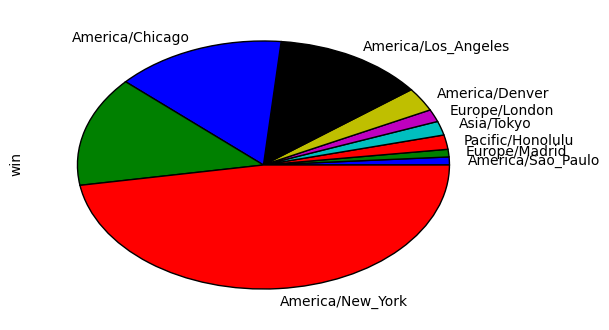

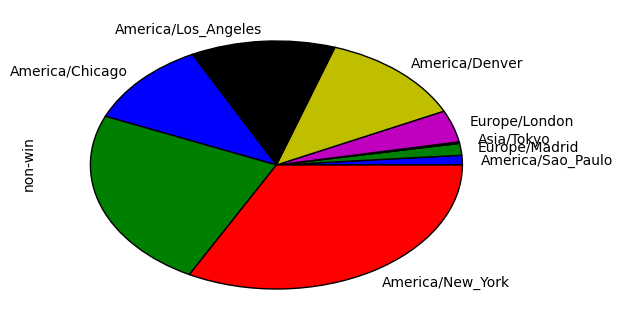

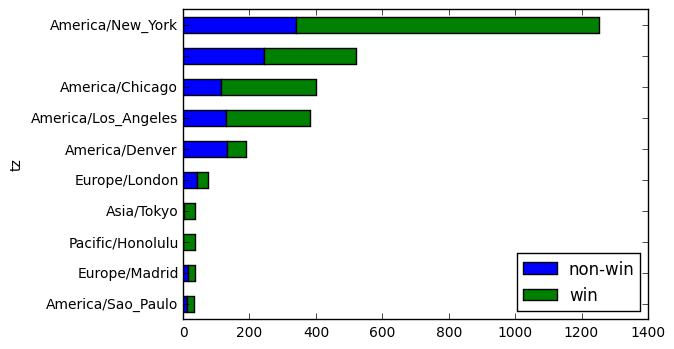

In [24]:
count_subset['win'].plot(kind='pie', subplots=True)
plt.show()
count_subset['non-win'].plot(kind='pie', subplots=True)
plt.show()
count_subset.plot(kind='barh', stacked=True)
plt.show()

.sum(1) sums along the y-axis. ie, along the row so that op = (#rows,1)


                      non-win       win
tz                                     
America/Sao_Paulo    0.393939  0.606061
Europe/Madrid        0.457143  0.542857
Pacific/Honolulu     0.000000  1.000000
Asia/Tokyo           0.054054  0.945946
Europe/London        0.581081  0.418919
America/Denver       0.691099  0.308901
America/Los_Angeles  0.340314  0.659686
America/Chicago      0.287500  0.712500
                     0.470250  0.529750
America/New_York     0.270983  0.729017


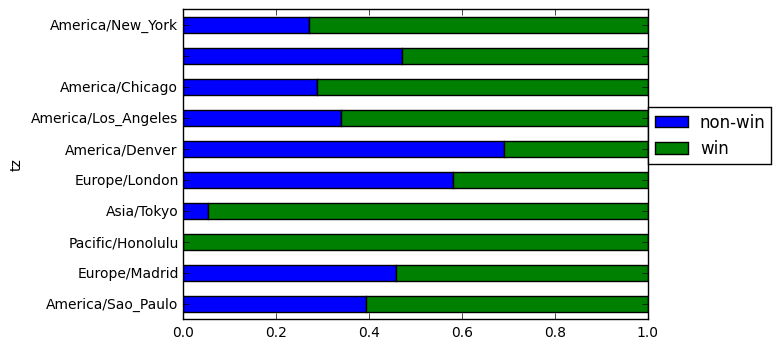

In [25]:
print(count_subset.div(count_subset.sum(1), axis=0))
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)
plt.legend(loc=(1,0.5))
plt.show()

# MovieLens 1M Data Set
